$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$
$\newcommand{\bmw}{\large \boldsymbol{w} \normalsize}$
$\newcommand{\bme}{\large \boldsymbol{e} \normalsize}$
$\newcommand{\bmu}{\large \boldsymbol{u} \normalsize}$


# Empalme con la clase anterior.

# Metodo de Crank-Nicolson
Los metodos que hemos estudiado hasta este punto son del orden (error) $\mathcal{O}(\Delta t)$. John Crank y Phyllis Nicolson publicaron en 1947 un metodo que es preciso del orden $\mathcal{O}(\Delta t^2)$.

Voy a explicar lo que hicieron este par de personajes.

* Discretizacion FTCS

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = \alpha \frac{w_{i+1j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}  + \mathcal{O}(\Delta x^2) - \frac{\partial^2 u}{\partial t^2} (c_1) \Delta t$$
donde $c_1 \in [t_j, t_{j+1}]$.
Hicimos explicito el error en teimpo de

$$\epsilon_{\text{ftcs}} = -\frac{\partial^2 u}{\partial t^2}(c_1) \Delta t $$

* Discretizacion BTCS. Asumiendo que estamos parados en tiempo en $t_{j+1}$

$$\frac{w_{i j+1}- w_{ij}}{\Delta t} = \alpha
\frac{w_{i+1 j+1} - w _{i j+1} + w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) + \frac{\partial^2 u}{\partial t^2}(c_2) \Delta t$$

Es decir, sin escribir los terminos de error

* FTCS
$$\frac{w_{i j+1} - w_{ij}}{\Delta t}= \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} $$

* BTCS
$$\frac{w_{i j+1} - w_{ij+1}}{\Delta t}= \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2} $$

Es interesante que estos dos esquemos se pueden escribir de forma unificacada como

$$\frac{w_{i j+1} - w_{ij}}{\Delta t}= S \left ( \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2} \right ) + (1- S)  \alpha \frac{w_{i+1 j+1} - 2 w_{ij+1} + w_{i-1 j+1}}{\Delta x^2}  $$



Crank-Nicolson eligieron $S=1/2$
Entonces

$$ \frac{w_{i j+1} - w_{ij}}{\Delta t} =
\alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{2 \Delta x^2} + \alpha \frac{w_{i+1 j+1} -2 w-{i j+1} + w_{i-1 j+1}}{2 \Delta x^2} + \mathcal{O}(\Delta x^2) +  \frac{\partial^2 u}{\partial t^2}(c_2) \Delta t - \frac{\partial^2 u}{\partial t^2}(c_1) \Delta t $$

Se usa el teorema del valor medio TVM en el intervalo


$[t_i, t_i+\Delta t]$

$$\frac{\partial^2 u }{\partial t^2}(c_2) - \frac{\partial^2 u}{\partial t^2}(c_1)  = \frac{\partial^3 u}{\partial t^3}(c) \Delta t $$
con $c \in [c_1, c_2]$ si $c_1 < c_2$.

De forma que

$$ \frac{w_{i j+1} - w_{ij}}{\Delta t} =
\alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{2 \Delta x^2} + \alpha \frac{w_{i+1 j+1} -2 w_{i j+1} + w_{i-1 j+1}}{2 \Delta x^2} + \mathcal{O}(\Delta x^2) + \frac{\partial^3 u}{\partial t^3}(c) \Delta t^2 $$


$$ \frac{w_{i j+1} - w_{ij}}{\Delta t} =
\alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{2 \Delta x^2} + \alpha \frac{w_{i+1 j+1} -2 w_{i j+1} + w_{i-1 j+1}}{2 \Delta x^2} $$




Movemos todos los terminos en $j+1$ a la izquierda, con orden $i-1,i,i+1$. Para simplificar llamamos $\beta=\alpha \Delta t/(2 \Delta x^2)$

$$-\beta w_{i-1 j+1}  + (1 + 2 \beta) w_{i j+1} - \beta w_{i+1 j+1} = \beta w_{i-1 j} + (1 - 2 \beta) w_{ij} + \beta w_{i+1 j} \tag{1} $$

Este es el esquema Crank-Nicholson.

La molecula es:





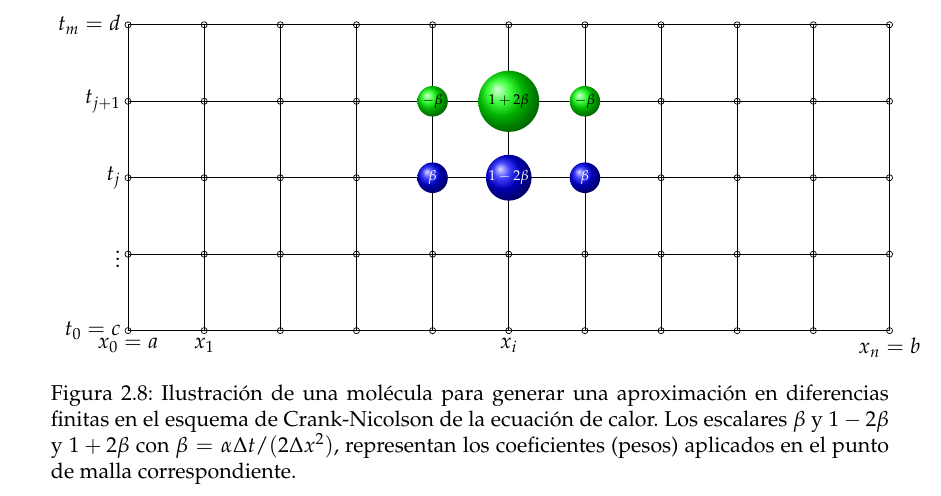

Escribamos el metodo de Crank Nicholson en forma matricial.
La tecnica es la misma $i=1$, $i=n-1$.
(el $2$ y el $n-2$ son ayuda pero no se reflejan en las condiciones de frontera.
Usamos la ecuacion (1) como guia.

* Para $i=1$.
$$-\beta w_{0 j+1}  + (1 + 2 \beta) w_{1 j+1}
- \beta w_{2 j+1} = \beta w_{0 j} + (1 - 2 \beta) w_{ij} + \beta w_{2 j}  $$

Rescribamos esta ecuacion separando los valores de frontera ($w_{0j}, w_{0 j+1}$

Es decir

$$ (1 + 2 \beta) w_{1 j+1}
- \beta w_{2 j+1} =  (1 - 2 \beta) w_{ij} + \beta w_{2 j}  + \beta w_{0j} + \beta w_{0 j+1} $$

* Para $i=n-1$.
$$-\beta w_{n-2 j+1}  + (1 + 2 \beta) w_{n-1 j+1} - \beta w_{n j+1} = \beta w_{n-2 j} + (1 - 2 \beta) w_{n-1 j} + \beta w_{n j} $$
Debemos tiarar a la derecha los terminos en $w_{nj+1}$ y $w_{nj}$

Es decir

$$-\beta w_{n-2 j+1}  + (1 + 2 \beta) w_{n-1 j+1}  = \beta w_{n-2 j} + (1 - 2 \beta) w_{n-1 j} + \beta w_{n j} + \beta w_{n j+1} $$

Con esto ya estamos listos para el sistema matricial.

$$
\begin{pmatrix}
1 + 2 \beta & - \beta & 0  & \cdots & \cdots & 0 \\
- \beta & 1 + 2 \beta & - \beta &  \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots  & 0 \\
\vdots & \ddots & \ddots & -\beta &  1 + 2 \beta & -\beta \\
0 & \cdots & \cdots & 0 & \beta & 1 - 2 \beta
\end{pmatrix}
\begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
w_{n-2 j+1} \\
w_{n-1 j+1}
\end{pmatrix}
=
\begin{pmatrix}
1 - 2 \beta &  \beta & 0  & \cdots & \cdots & 0 \\
 \beta & 1 - 2 \beta &  \beta &  \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots  & 0 \\
\vdots & \ddots & \ddots & \beta &  1 - 2 \beta & \beta \\
0 & \cdots & \cdots & 0 & \beta & 1 - 2 \beta
\end{pmatrix}
\begin{pmatrix}
w_{1 j} \\
w_{2 j} \\
\vdots \\
w_{n-2 j} \\
w_{n-1 j}
\end{pmatrix}
+ \beta
\begin{pmatrix}
w_{0j} + w_{0 j+1} \\
0 \\
\vdots \\
0 \\
w_{nj} + w_{n j+1}
\end{pmatrix}
$$

El pseudocodigo se muestra en la siguiente figura.

i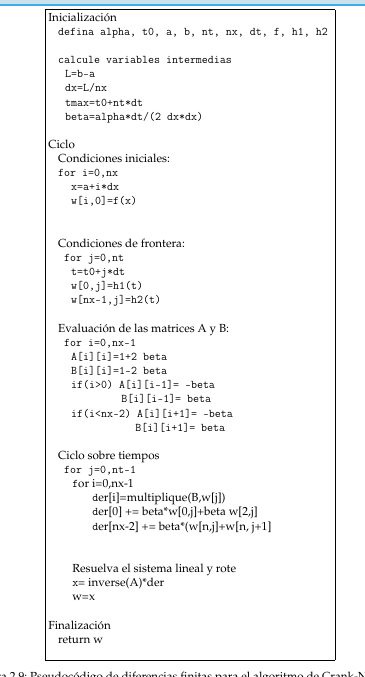

Antes de implementar el codigo en `Python` vamos a ver el analisis de estabilidad

* Como $\beta > 0$.
$1 + 2 \beta  > | \beta |$ de forma que la matriz a la izquierda es diaognalmente dominante y el sistem es estable.

* Sin embargo vamos estudiar la estabilidad usando el metodo de
John Von Neumann.
El termino generico de la solucion numerica es

$$w_{ij} = \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} $$

Lo importante es ver que el factor de ganancia $G$

$$G = \frac{w_{i j+1}}{w_{ij}} = \mathrm{e}^{\alpha \Delta t} $$

La ecuacion de propagacion (1) queda como

$$-\beta \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_{i-1}}  + (1 + 2 \beta) \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i}   - \beta  \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_{i+1}}  = \beta \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i-1}} + (1 - 2 \beta) \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} + \beta \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i+1}}   $$

Dididimos la ecuacion anterior por $w_{ij}=\mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} $, el resultado
es, recordando que $G=\mathrm{e}^{\alpha \Delta t}$.

$$-\beta G \mathrm{e}^{- \mathrm{i} \Delta x} + (1 + 2 \beta) G - \beta G \mathrm{e}^{\mathrm{i} \Delta x} = \beta \mathrm{e}^{-\mathrm{i} k  \Delta x} + (1 - 2 \beta)  + \beta \mathrm{e}^{\mathrm{i} k \Delta x}. $$

Depejamos $G$ de esta ecuacion y recordando
Ademas
$$1 - \cos A = 1 - \cos 2 (A/2) = 1 - \cos^2 (A/2) + \sin^2 (A/2) = \sin^2 (A/2) + \sin^2 (A/2) = 2 \sin^2 A/2 $$






$$\frac{\mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x}}{2} = \cos k \Delta x
$$


$$G =
\frac{1 - 2 \beta + 2 \beta \cos k \Delta x}{1 + 2 \beta - 2 \beta \cos k \Delta x}
=
\frac{1 - 2 \beta (1 - \cos k \Delta x)}{1 - 2 \beta(1 - \cos k \Delta x)}  = \frac{1 - 4 \beta \sin^2 (k \Delta x/2)}{1 + 4 \beta \sin^2( k \Delta x/2}
$$







Como $\beta \sin^2 (A) \ge 0$, entonces el numerador es mas pequenho que el denominador y por tanto

$$| G | \le 1 $$
y el sistema es estable.

## Solucion numerica

In [10]:
# implementacion
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg


def solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f):
    # defina variables
    L = float(b-a)
    dx = L/(nx-1)
    beta=0.5*alpha*dt/dx**2

    tmax=nt*dt + t0
    t=np.arange(t0, tmax, dt)

    # inicialice w
    w = np.zeros((nx, nt))
    X=np.linspace(a, b, nx)

    print("dimensiones de w", w.shape)

    # condiciones de frontera
    for j in range(nt):
        w[0, j] = 0
        w[nx-1, j] = 0

    # vcector de la derecha
    rhs = np.zeros(nx-2)

    # inicializacion de A, B, b
    A = np.zeros([nx-2, nx-2])
    B = np.zeros([nx-2, nx-2])
    b = np.zeros(nx-2)

    # condicion inicial
    w[:, 0] = np.asarray([f(xx) for xx in X]) #previously np.array()

    # lleno de matrices A,B
    # OJOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
    for i in range(nx-2):  # had a range(1:nx-2)
        A[i][i] = 1.0 + 2*beta
        B[i][i] = 1.0 - 2*beta
        if i>0 :
            A[i][i-1] = -beta
            B[i][i-1] = beta
        if i<nx-3:
            A[i][i+1] = -beta
            B[i][i+1] = beta
        b[0] = beta*(w[0,1] + w[0,0])
        b[nx-3] = beta*(w[nx-1, 1] + w[nx-1,0])

        rhs = B.dot(w[1:-1, 0]) + b

    # print matrices A, B, b for verification
    print("A", A)
    print("\n"*4)
    print("B", B)
    # ciclo sobre tiempos
    for j in range(0, nt-1):

        # resuelve Au_w j+1 = B w_j
        x = linalg.solve(A, rhs)

        # actualiza w
        rhs = B.dot(x) + b

        # rotacion
        for i in range(nx-2):
            w[i+1, j+1] = x[i]

        b[0] = beta*(w[0,j+1] + w[0,j])
        b[nx-3] = beta*(w[nx-1,j] + w[nx-1,j+1])

    return w







In [11]:
# prueba
alpha=1
a=0
b=1
nt=40001
nx=101
dt=0.00001
t0=0
x0=0
L=b-a

def f(x):
    return 6*np.sin(np.pi*x/L)

w = solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f)


dimensiones de w (101, 40001)
A [[ 1.1  -0.05  0.   ...  0.    0.    0.  ]
 [-0.05  1.1  -0.05 ...  0.    0.    0.  ]
 [ 0.   -0.05  1.1  ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  1.1  -0.05  0.  ]
 [ 0.    0.    0.   ... -0.05  1.1  -0.05]
 [ 0.    0.    0.   ...  0.   -0.05  1.1 ]]





B [[0.9  0.05 0.   ... 0.   0.   0.  ]
 [0.05 0.9  0.05 ... 0.   0.   0.  ]
 [0.   0.05 0.9  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.9  0.05 0.  ]
 [0.   0.   0.   ... 0.05 0.9  0.05]
 [0.   0.   0.   ... 0.   0.05 0.9 ]]


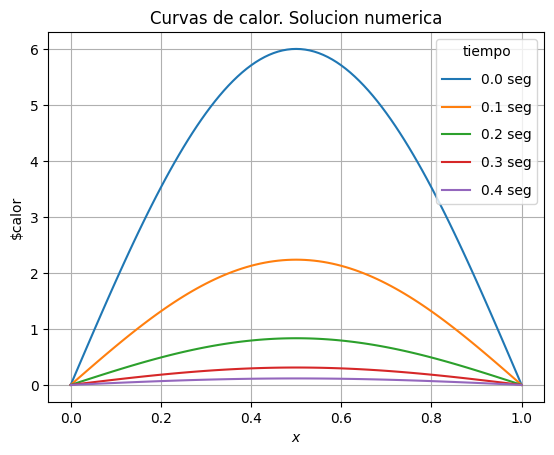

In [13]:
# Graficamos los resultados
Ndt = 10000

plt.xlabel(r"$x$")
plt.ylabel(r"$calor")
plt.title(r"Curvas de calor. Solucion numerica")

X = np.linspace(a,b,w.shape[0])
for j in range(0, nt, Ndt):
    t = j*dt
    plt.plot(X, w[:,j], label=str(round(t,1))+' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid(True)
plt.show()

## error con respecto a la solucion analitica

$$u(x,t) = 6 \sin \left (  \frac{\pi x}{L} \right ) \mathrm{e}^{-\frac12 \left ( \frac{\pi}{L} \right )^2 t } $$

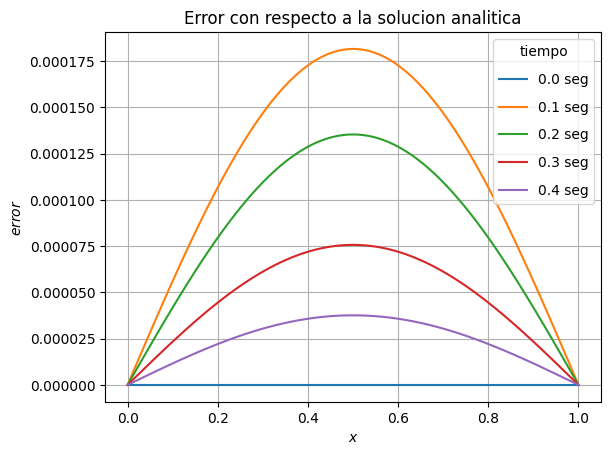

In [16]:
 # solucion analitica
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp( -(1.0/alpha)* (np.pi/L)**2 * t)

# inicialice vector w
nt=40001
dt = 0.00001
Nt = int(nt/10000) + 1
dx = (b-a)/(nx-1)
error = np.zeros((nx,Nt))
k = 0

for j in range(0, nt, 10000):
    t = j*dt
    for i in range(nx):
        x = i*dx
        error[i,k] = w[i,j]-u(x,t)
    k += 1

# graficamos el error
params ={'legend.fontsize':5, 'legend.handlengt':1}

plt.xlabel(r"$x$")
plt.ylabel(r"$error$")
plt.title(r"Error con respecto a la solucion analitica")

Dt = 0.1
X = np.linspace(a,b,w.shape[0])
for j in range(0, Nt):
    t = j*Dt
    plt.plot(X, error[:,j], label=str(round(t,1))+' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid(True)
plt.show()


dimensiones de w (101, 5)
A [[1001. -500.    0. ...    0.    0.    0.]
 [-500. 1001. -500. ...    0.    0.    0.]
 [   0. -500. 1001. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1001. -500.    0.]
 [   0.    0.    0. ... -500. 1001. -500.]
 [   0.    0.    0. ...    0. -500. 1001.]]





B [[-999.  500.    0. ...    0.    0.    0.]
 [ 500. -999.  500. ...    0.    0.    0.]
 [   0.  500. -999. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -999.  500.    0.]
 [   0.    0.    0. ...  500. -999.  500.]
 [   0.    0.    0. ...    0.  500. -999.]]


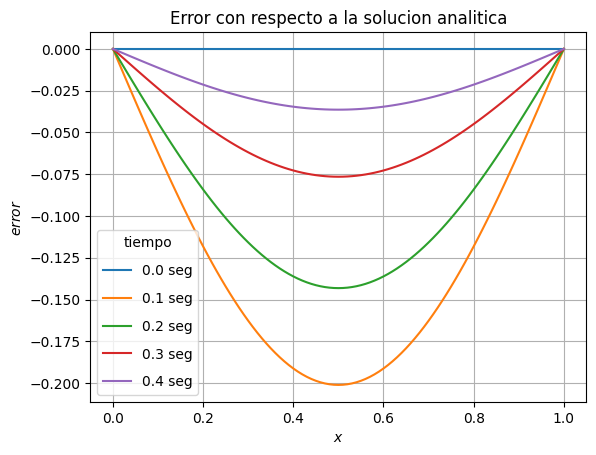

In [19]:
# que pasa si dt=0.1
nt =5
dt = 0.1
dx=(b-a)/(nx-1)
w = solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f)

error = np.zeros((nx,nt))
k=0
for j in range(nt):
    t = j*dt
    for i in range(nx):
        x = i*dx
        error[i,k] = w[i,j]-u(x,t)
    k += 1

# graficar el error

params ={'legend.fontsize':5, 'legend.handlengt':1}

plt.xlabel(r"$x$")
plt.ylabel(r"$error$")
plt.title(r"Error con respecto a la solucion analitica")

X =np.linspace(0,L,w.shape[0])
for j in range(nt):
    t = j*dt
    plt.plot(X, error[:,j], label=str(round(t,1))+' seg')
    plt.legend(labelspacing=1, title="tiempo")

plt.grid(True)
plt.show()

# Metodo de Leapfrog (salto de rana).
La idea de Leap-Frog es hacer un esquema entrado en tiempo y en espacio.

El esquema

$$\frac{w_{i j+1} - w_{i j-1}}{2 \Delta t}= \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j} }{\Delta x^2} $$
Este esquema seria de precision $\mathcal{O}(\Delta t^2)$ y
$\mathcal{O}(\Delta x^2)$. Se ve bueno en este sentido, pero **es estable**?


Despejando $w_{i j+1}$ encontramos

$$w_{i j+1} = 2 \gamma ( w_{i+1 j} - 2 w_{ij} + w_{i-1 j}) + w_{i j-1} $$
con $\gamma=\alpha \Delta t/\Delta x^2$.

# Proxima clase comenzamos hiperbolicas.


